Loaded cluster interpretations:
Cluster 0: Mobility-Dominant Patient Profile
Cluster 1: Pain-Dominant Patient Profile

CREATING VISUALIZATIONS...

1. RF Conditions Heatmap:


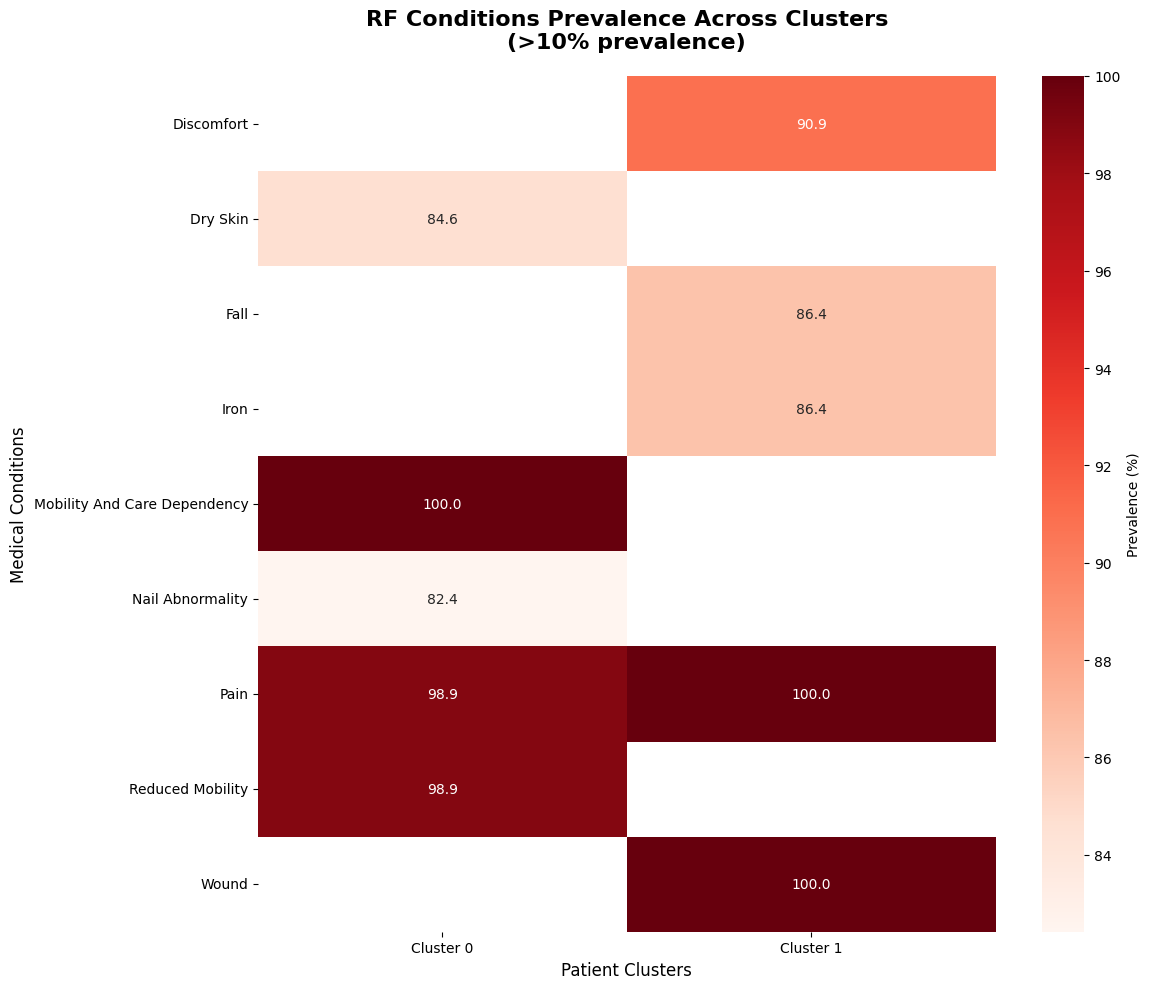

Heatmap saved as: rf_conditions_heatmap.png

2. Cluster Size Distribution:


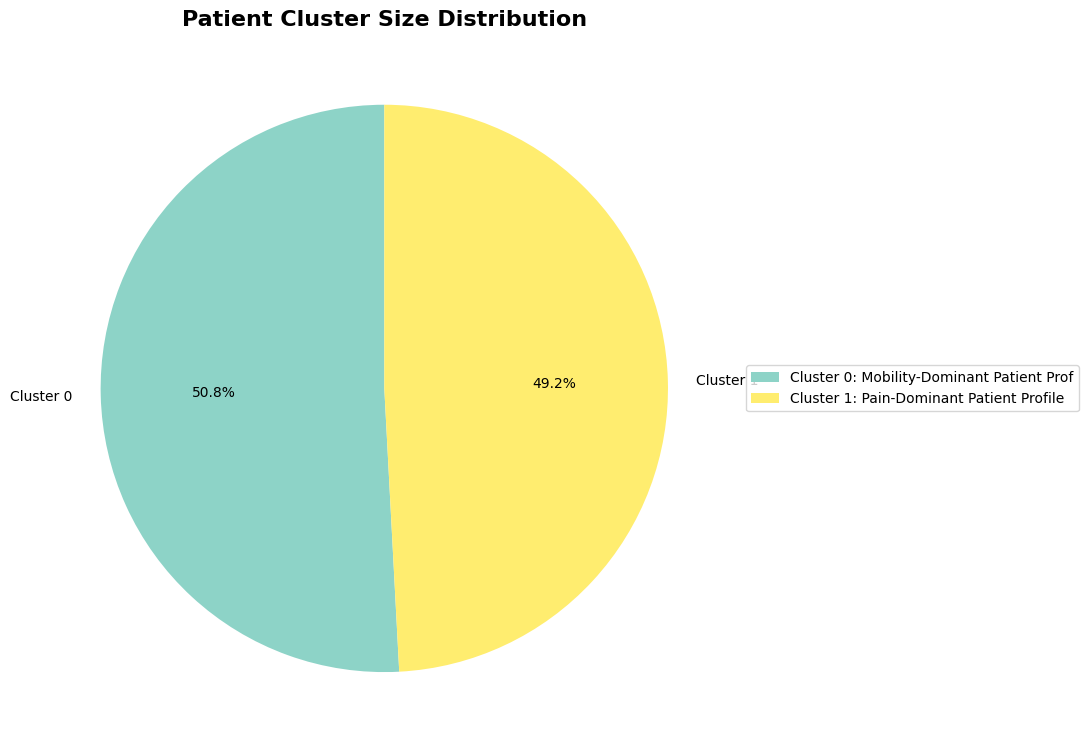

Cluster sizes chart saved as: cluster_sizes.png

3. Demographics Comparison:


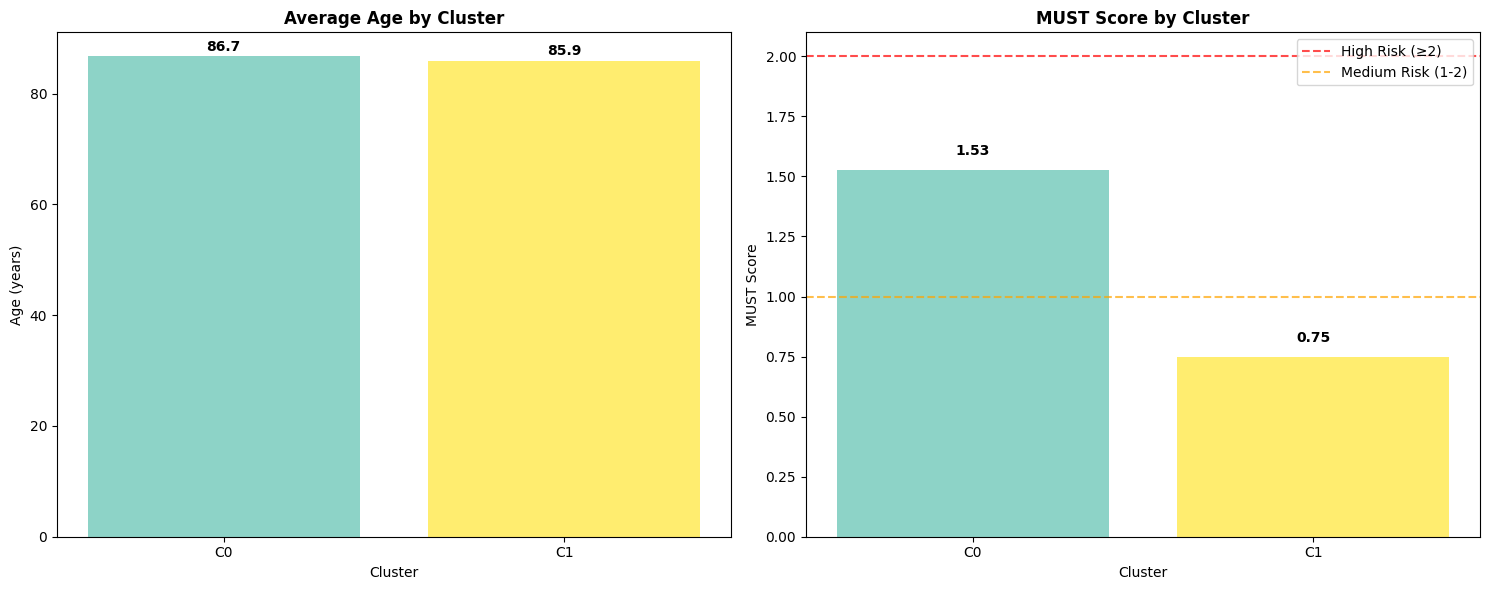

Demographics chart saved as: demographics_comparison.png

ALL VISUALIZATIONS COMPLETE!
Check your current directory for saved PNG files:
- rf_conditions_heatmap.png
- cluster_sizes.png
- demographics_comparison.png


In [5]:
# STEP 1: Load your models and get cluster_interpretations
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define dummy class for pickle loading
class PatientClusteringPipeline:
    def __init__(self, *args, **kwargs):
        pass

# Load your models
with open('patient_classifier_model.pkl', 'rb') as f:
    model_data = pickle.load(f)

cluster_interpretations = model_data.get('cluster_interpretations', {})

print("Loaded cluster interpretations:")
for cluster_id, info in cluster_interpretations.items():
    print(f"Cluster {cluster_id}: {info.get('phenotype', 'Unknown')}")

# STEP 2: Create the visualizations
def show_cluster_heatmap(cluster_interpretations):
    """Create and show the RF conditions heatmap"""
    
    # Prepare data
    condition_data = []
    
    for cluster_id, info in cluster_interpretations.items():
        top_conditions = info.get('top_rf_conditions', {})
        for condition, prevalence in top_conditions.items():
            clean_name = condition.replace('RF_', '').replace('_', ' ').title()
            condition_data.append({
                'Cluster': f"Cluster {cluster_id}",
                'Condition': clean_name,
                'Prevalence': prevalence * 100  # Convert to percentage
            })
    
    if not condition_data:
        print("No condition data found for visualization")
        return
    
    condition_df = pd.DataFrame(condition_data)
    
    # Create pivot table for heatmap
    heatmap_data = condition_df.pivot(index='Condition', columns='Cluster', values='Prevalence')
    
    # Create the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='Reds', 
                cbar_kws={'label': 'Prevalence (%)'})
    
    plt.title('RF Conditions Prevalence Across Clusters\n(>10% prevalence)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Patient Clusters', fontsize=12)
    plt.ylabel('Medical Conditions', fontsize=12)
    
    # Rotate labels for better readability
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.savefig('rf_conditions_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Heatmap saved as: rf_conditions_heatmap.png")

def show_cluster_sizes(cluster_interpretations):
    """Create and show cluster size distribution"""
    
    cluster_ids = []
    sizes = []
    phenotypes = []
    
    for cluster_id, info in cluster_interpretations.items():
        cluster_ids.append(f"Cluster {cluster_id}")
        sizes.append(info.get('size', 0))
        phenotypes.append(info.get('phenotype', 'Unknown')[:30])  # Truncate long names
    
    # Create pie chart
    plt.figure(figsize=(10, 8))
    colors = plt.cm.Set3(np.linspace(0, 1, len(cluster_ids)))
    
    wedges, texts, autotexts = plt.pie(sizes, labels=cluster_ids, autopct='%1.1f%%', 
                                       colors=colors, startangle=90)
    
    plt.title('Patient Cluster Size Distribution', fontsize=16, fontweight='bold')
    
    # Add legend with phenotypes
    legend_labels = [f"{cluster_ids[i]}: {phenotypes[i]}" for i in range(len(cluster_ids))]
    plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.tight_layout()
    plt.savefig('cluster_sizes.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Cluster sizes chart saved as: cluster_sizes.png")

def show_demographics(cluster_interpretations):
    """Show demographics comparison"""
    
    cluster_ids = []
    ages = []
    must_scores = []
    
    for cluster_id, info in cluster_interpretations.items():
        cluster_ids.append(f"C{cluster_id}")
        ages.append(info.get('avg_age', 0) if info.get('avg_age') else 0)
        must_scores.append(info.get('must_score', 0) if info.get('must_score') else 0)
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Age comparison
    bars1 = ax1.bar(cluster_ids, ages, color=plt.cm.Set3(np.linspace(0, 1, len(cluster_ids))))
    ax1.set_title('Average Age by Cluster', fontweight='bold')
    ax1.set_ylabel('Age (years)')
    ax1.set_xlabel('Cluster')
    
    # Add value labels
    for bar, age in zip(bars1, ages):
        if age > 0:
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    f'{age:.1f}', ha='center', va='bottom', fontweight='bold')
    
    # MUST score comparison
    bars2 = ax2.bar(cluster_ids, must_scores, color=plt.cm.Set3(np.linspace(0, 1, len(cluster_ids))))
    ax2.set_title('MUST Score by Cluster', fontweight='bold')
    ax2.set_ylabel('MUST Score')
    ax2.set_xlabel('Cluster')
    
    # Add risk zones
    ax2.axhline(y=2, color='red', linestyle='--', alpha=0.7, label='High Risk (≥2)')
    ax2.axhline(y=1, color='orange', linestyle='--', alpha=0.7, label='Medium Risk (1-2)')
    
    # Add value labels
    for bar, score in zip(bars2, must_scores):
        if score > 0:
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                    f'{score:.2f}', ha='center', va='bottom', fontweight='bold')
    
    ax2.legend()
    
    plt.tight_layout()
    plt.savefig('demographics_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Demographics chart saved as: demographics_comparison.png")

# STEP 3: Run the visualizations
print("\n" + "="*50)
print("CREATING VISUALIZATIONS...")
print("="*50)

# Show RF conditions heatmap (most important)
print("\n1. RF Conditions Heatmap:")
show_cluster_heatmap(cluster_interpretations)

# Show cluster sizes
print("\n2. Cluster Size Distribution:")
show_cluster_sizes(cluster_interpretations)

# Show demographics
print("\n3. Demographics Comparison:")
show_demographics(cluster_interpretations)

print("\n" + "="*50)
print("ALL VISUALIZATIONS COMPLETE!")
print("Check your current directory for saved PNG files:")
print("- rf_conditions_heatmap.png")
print("- cluster_sizes.png") 
print("- demographics_comparison.png")
print("="*50)